In [9]:
# Copyright Amazon.com, Inc. or its affiliates. All Rights Reserved.
# SPDX-License-Identifier: MIT-0

# REQUIRED: Set pathname which contains the `BBBC005_v1` dataset used for training the model
IMG_PATH = "/root/BBBC005_v1_images/"

In [10]:
import boto3
import numpy as np
import json
import urllib.parse
import os

from sagemaker import get_execution_role
from sagemaker import Session
from sagemaker.tensorflow.serving import Model
from PIL import Image
from io import StringIO

import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
role = get_execution_role()
sess = Session()
bucket = sess.default_bucket()

# Create a low-level client representing Amazon SageMaker Runtime
sagemaker_runtime = boto3.client("sagemaker-runtime", region_name="ap-southeast-2")

# The name of the endpoint. The name must be unique within an AWS Region in your AWS account. 
endpoint_name='cell-segmentation-model'

IMG_NAME = "SIMCEPImages_A10_C40_F1_s21_w1.TIF"

<class 'numpy.ndarray'>
(512, 512, 1)


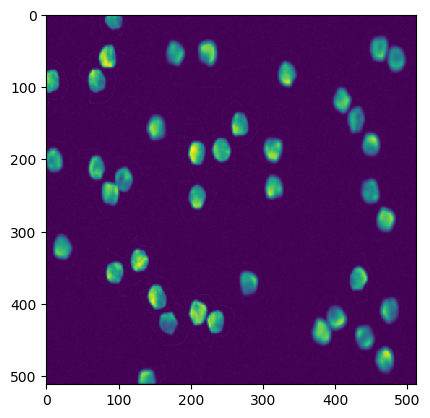

In [12]:
img=Image.open(IMG_PATH + IMG_NAME)

newsize = (512, 512)
img = img.resize(newsize)

# Show the image for debugging
plt.imshow(img)

img = np.array(img)# convert to np array
img = np.expand_dims(img, axis=-1)
print(type(img))
print(img.shape)

In [13]:
# Fire off the image to be processed by our SageMaker inference endpoint
data = json.dumps({'input_1': img.tolist()})

response = sagemaker_runtime.invoke_endpoint(EndpointName=endpoint_name,
                                   ContentType='application/json',
                                   Body=data)
result = json.loads(response['Body'].read().decode())
res = result['predictions']

print(type(res))
#numpy.fromstring(res)
arr = np.array(res)

preds_test_thresh = (arr >= 0.5).astype(np.uint8)

#print(preds_test_thresh)
print(preds_test_thresh.shape)

output = preds_test_thresh[0, :, :, 0]

<class 'list'>
(1, 512, 512, 1)


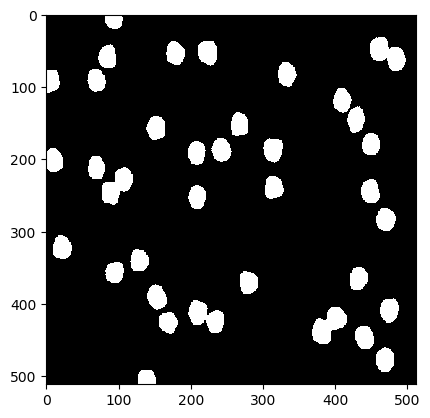

In [14]:
plt.imshow(output, cmap='gray')